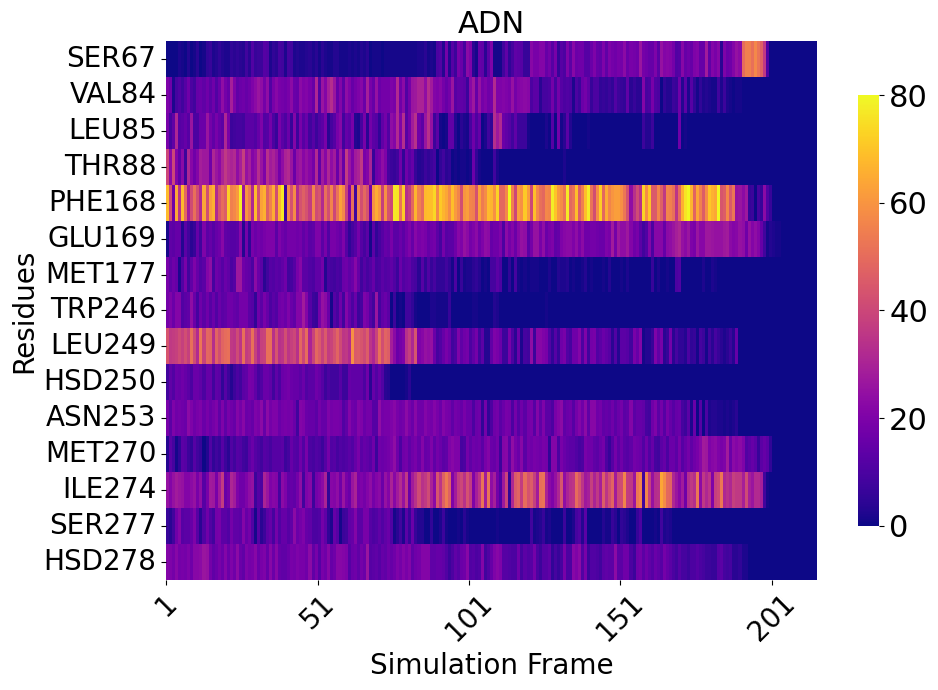

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse and extract contact matrix with residue labels
def parse_contacts_with_residue_names(filepath):
    with open(filepath) as f:
        content = f.read()

    blocks = re.split(r'freeSelLabel (.*?)\n', content)

    residue_labels = []
    contact_matrix = []

    for i in range(1, len(blocks)-1, 2):
        label = blocks[i].strip()
        data_block = blocks[i+1].strip().splitlines()

        match = re.match(r'([A-Z]+)\s+(\d+)', label)
        if match:
            resname = match.group(1)
            resid = match.group(2)
            residue_labels.append(f"{resname}{resid}")
        else:
            residue_labels.append(f"Res{i//2}")

        values = []
        for line in data_block:
            parts = line.strip().split()
            if len(parts) == 2 and parts[0].isdigit():
                values.append(int(parts[1]))
        contact_matrix.append(values)

    df = pd.DataFrame(contact_matrix, index=residue_labels)
    df.columns.name = None
    return df

# Load the contact file
df = parse_contacts_with_residue_names("contacts.txt")

# Plot the heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df, cmap="plasma", cbar_kws={'shrink': 0.8})

plt.title("ADN", fontsize=22)
plt.xlabel("Simulation Frame", fontsize=20)
plt.ylabel("Residues", fontsize=20)

# X-axis: every 50th frame
xticks = range(0, df.shape[1], 50)
plt.xticks(
    ticks=xticks,
    labels=[str(i + 1) for i in xticks],
    rotation=45,
    fontsize=20
)

# Y-axis: horizontal and large
plt.yticks(rotation=0, fontsize=20)

# Make the colorbar tick labels larger and remove its label
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label("")  # Remove the default label

plt.tight_layout()
plt.show()



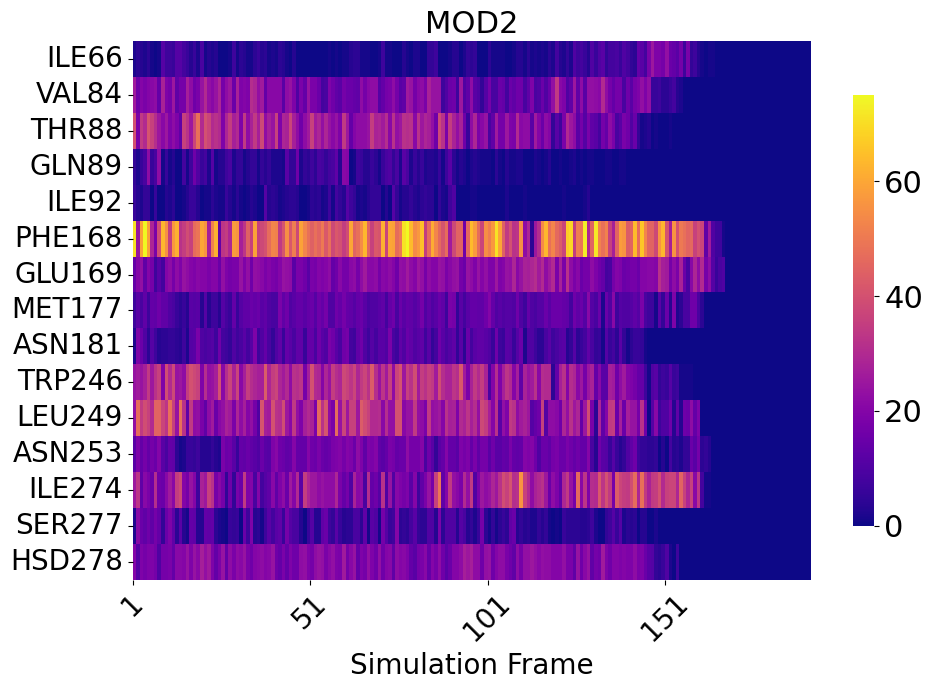

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Function to parse and extract contact matrix with residue labels
def parse_contacts_with_residue_names(filepath):
    with open(filepath) as f:
        content = f.read()

    blocks = re.split(r'freeSelLabel (.*?)\n', content)

    residue_labels = []
    contact_matrix = []

    for i in range(1, len(blocks)-1, 2):
        label = blocks[i].strip()
        data_block = blocks[i+1].strip().splitlines()

        match = re.match(r'([A-Z]+)\s+(\d+)', label)
        if match:
            resname = match.group(1)
            resid = match.group(2)
            residue_labels.append(f"{resname}{resid}")
        else:
            residue_labels.append(f"Res{i//2}")

        values = []
        for line in data_block:
            parts = line.strip().split()
            if len(parts) == 2 and parts[0].isdigit():
                values.append(int(parts[1]))
        contact_matrix.append(values)

    df = pd.DataFrame(contact_matrix, index=residue_labels)
    df.columns.name = None
    return df

# Load the contact file
df = parse_contacts_with_residue_names("contactsMOD2.txt")

# Plot the heatmap
plt.figure(figsize=(10, 7))
heatmap = sns.heatmap(df, cmap="plasma", cbar_kws={'shrink': 0.8})

plt.title("MOD2", fontsize=22)
plt.xlabel("Simulation Frame", fontsize=20)
plt.ylabel("Residues", fontsize=20)

# X-axis: every 50th frame
xticks = range(0, df.shape[1], 50)
plt.xticks(
    ticks=xticks,
    labels=[str(i + 1) for i in xticks],
    rotation=45,
    fontsize=20
)

# Y-axis: horizontal and large
plt.yticks(rotation=0, fontsize=20)

# Make the colorbar tick labels larger and remove its label
colorbar = heatmap.collections[0].colorbar
colorbar.ax.tick_params(labelsize=22)
colorbar.set_label("")  # Remove the default label

plt.tight_layout()
plt.show()

